In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [5]:
APPLstock= pd.read_csv("AAPL.csv")
GOOGLstock=pd.read_csv("GOOG.csv")
IBMstock = pd.read_csv("IBM.csv")
AMZNstock = pd.read_csv('AMZN.csv')
MSFTstock = pd.read_csv('MSFT.csv')

APPLstock = APPLstock.drop(APPLstock.index[36:])
GOOGLstock = GOOGLstock.drop(GOOGLstock.index[36:])
IBMstock = IBMstock.drop(IBMstock.index[36:])
MSFTstock = MSFTstock.drop(MSFTstock.index[36:])
AMZNstock = AMZNstock.drop(AMZNstock.index[36:])

In [9]:
df = pd.read_csv("finalInput.csv",encoding="ISO-8859-1")
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df.head()

,Unnamed: 0,NewsContent,author,publishedDate,title,AAPL_company,IBM_company,GOOGL_company,AMZN_company,MSFT_company,AAPL_senti,IBM_senti,GOOGL_senti,AMZN_senti,MSFT_senti
0,0,"MILAN/ROME, March 27 (Reuters) - Italian stat...",NaN,2019-03-27 13:22:00,Italian state lender seeks to broker truce bet...,0,0,0,0,0,0,0,0,0,0
1,1,April 5 (Reuters) - Representatives of Venezu...,NaN,2019-04-05 18:23:00,Lawyers for Venezuela's Guaido ask U.S. court ...,0,0,0,0,0,0,0,0,0,0
2,2,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,2019-04-05 17:49:00,Petrobras agrees to sell pipeline unit to Engi...,0,0,0,0,0,0,0,0,0,0
3,3,Top Tech Stocks MSFT -1.59% AAPL +0.61% IBM -0...,MT Newswires,2019-03-27 13:18:46,"Technology Sector Update for 03/27/2019: NTWK,...",1,0,1,0,1,1,0,-1,0,-1
4,4,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,2019-04-05 17:49:00,Engie bids $8.6 bln for Petrobras pipeline uni...,0,0,0,0,0,0,0,0,0,0


In [4]:
# number of news in each company
df_Newscompany = df.drop(['Unnamed: 0','author','publishedDate','title','NewsContent','AAPL_senti','IBM_senti','GOOGL_senti','AMZN_senti','MSFT_senti'], axis = 1)
counts = []
categories = list(df_Newscompany.columns.values)

for i in categories:
    counts.append((i,df_Newscompany[i].sum()))
    df_stats = pd.DataFrame(counts,columns=["categories","number_of_comments"])
df_stats

,categories,number_of_comments
0,AAPL_company,128
1,IBM_company,90
2,GOOGL_company,109
3,AMZN_company,27
4,MSFT_company,103


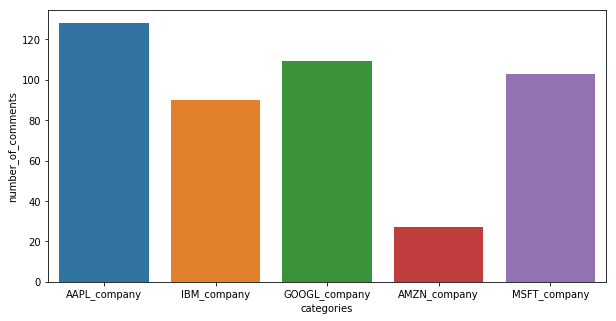

In [14]:
plt.figure(figsize=(10,5)，)
sns.barplot(x='categories',y='number_of_comments',data=df_stats)

# Movement Function

In [ ]:
def movement_graph(df,col1,col2,col3):
    ''' 
    input: dataframe, and company col name, and sentiment col, and time col; ex:df
    output: a line plot of the movement; ex:"AAPL_company"
    '''
    #import pandas as pd
    dfnew = df[df[col1] == 1]
    dfnew = dfnew.sort_values(by=[col3])
    dfSenti_list = []
    dfScore = list(dfnew[col2])
    for a in range(len(dfScore)):
        score = sum(dfScore[0:a])
        dfSenti_list.append(score)
    dfnew['movement'] = dfSenti_list
    plt.figure(figsize=(20,5),dpi=100)
    ax = sns.lineplot(x=col3,y = 'movement', data =dfnew )
    title = col1 + " movement"
    plt.title(title)
    plt.show()

In [28]:
def stock_movement(df,dateCol,priceCol,CompanyName):
    '''
    input: stock price dataframe; date column; price Column; Company Name
    output: graph of stock price movement
    '''
    df[dateCol] = pd.to_datetime(df[dateCol])
    palette = sns.color_palette("mako_r", 6)
    plt.figure(figsize=(20,5),dpi=100)
    ax = sns.lineplot(x=dateCol,y=priceCol,data = df)
    title = CompanyName + ' Stock Price Movement'
    plt.title(title)
    plt.show()

# APPL

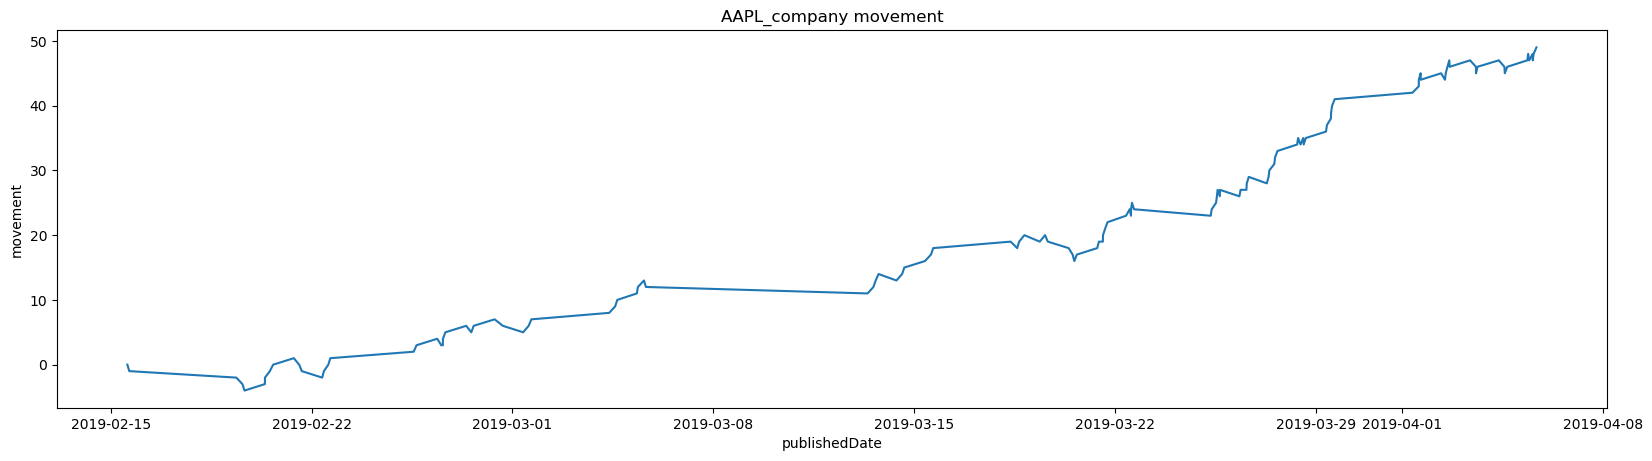

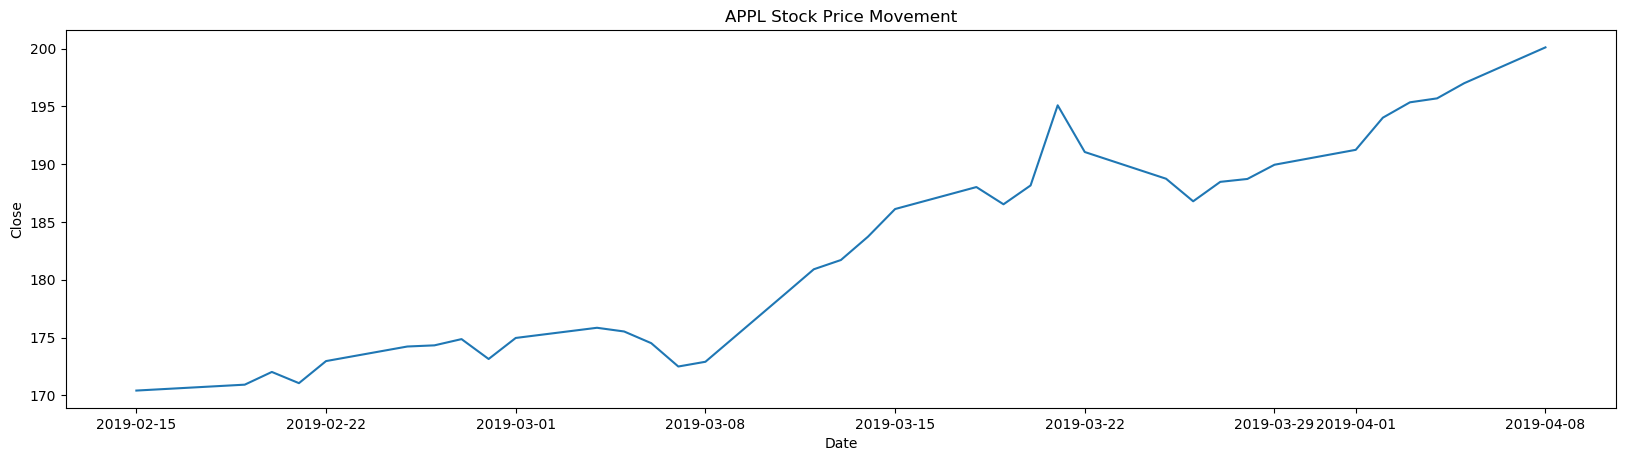

In [34]:
movement_graph(df,'AAPL_company','AAPL_senti','publishedDate')
stock_movement(APPLstock,'Date','Close','APPL')

# GOOGL

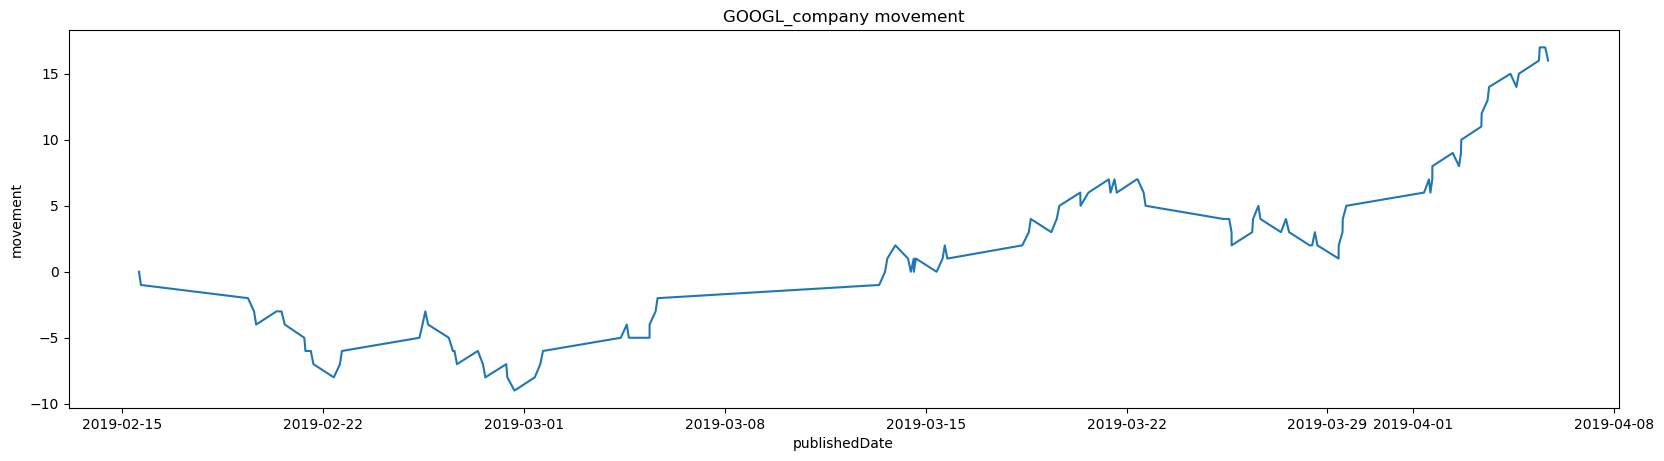

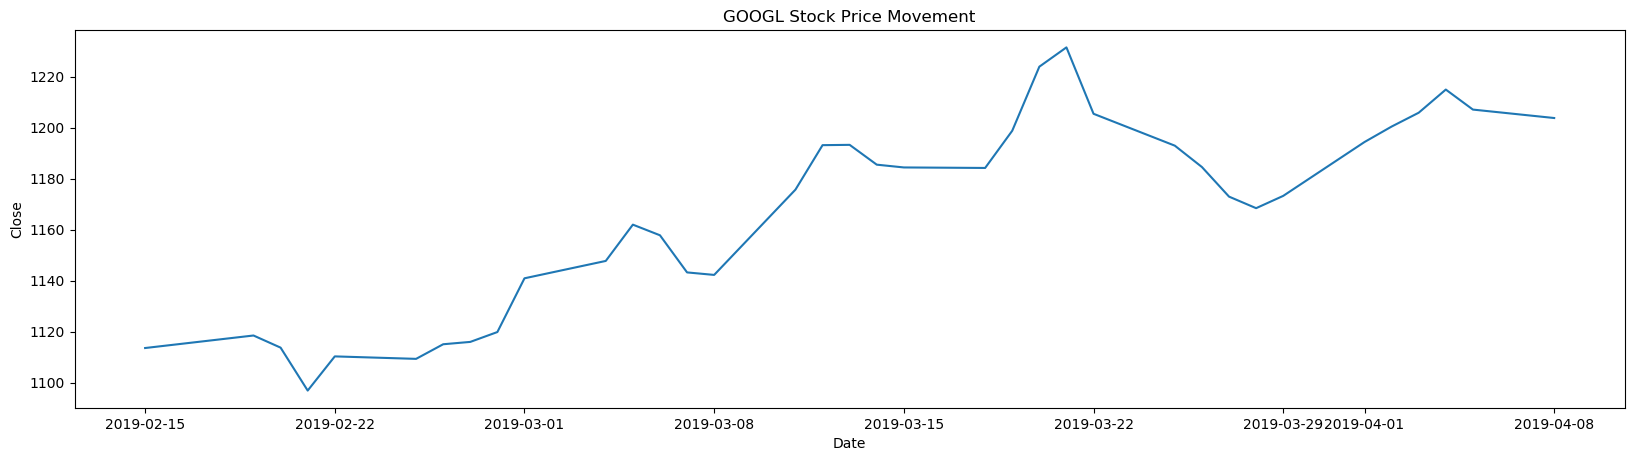

In [30]:
movement_graph(df,'GOOGL_company','GOOGL_senti','publishedDate')
stock_movement(GOOGLstock,'Date','Close','GOOGL')

# IBM

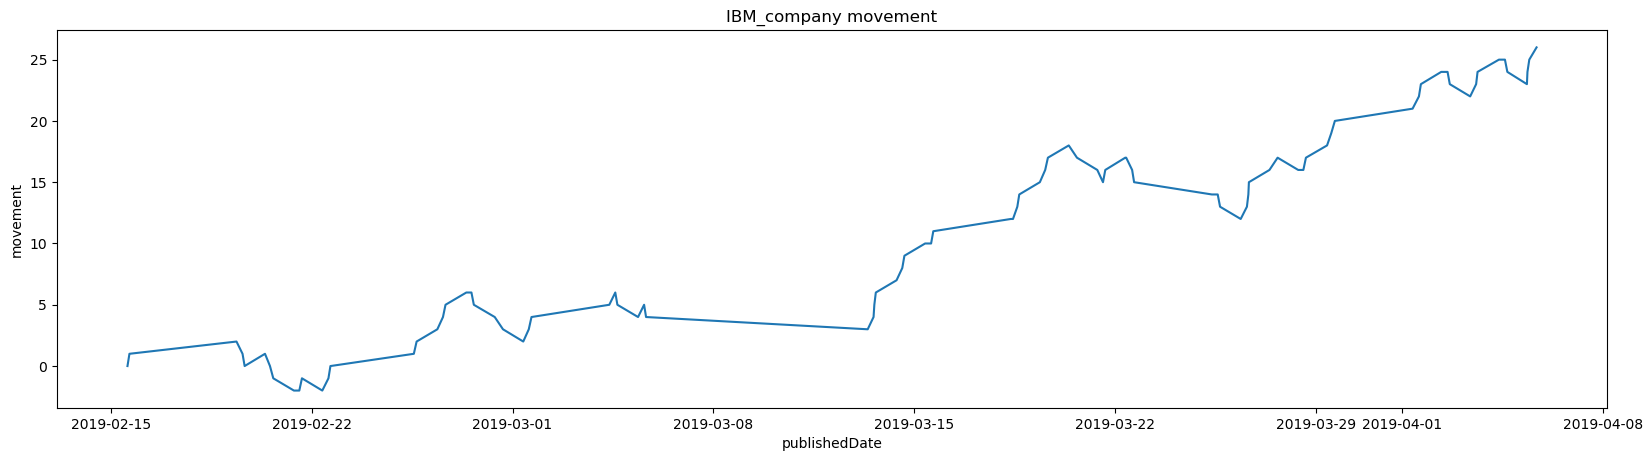

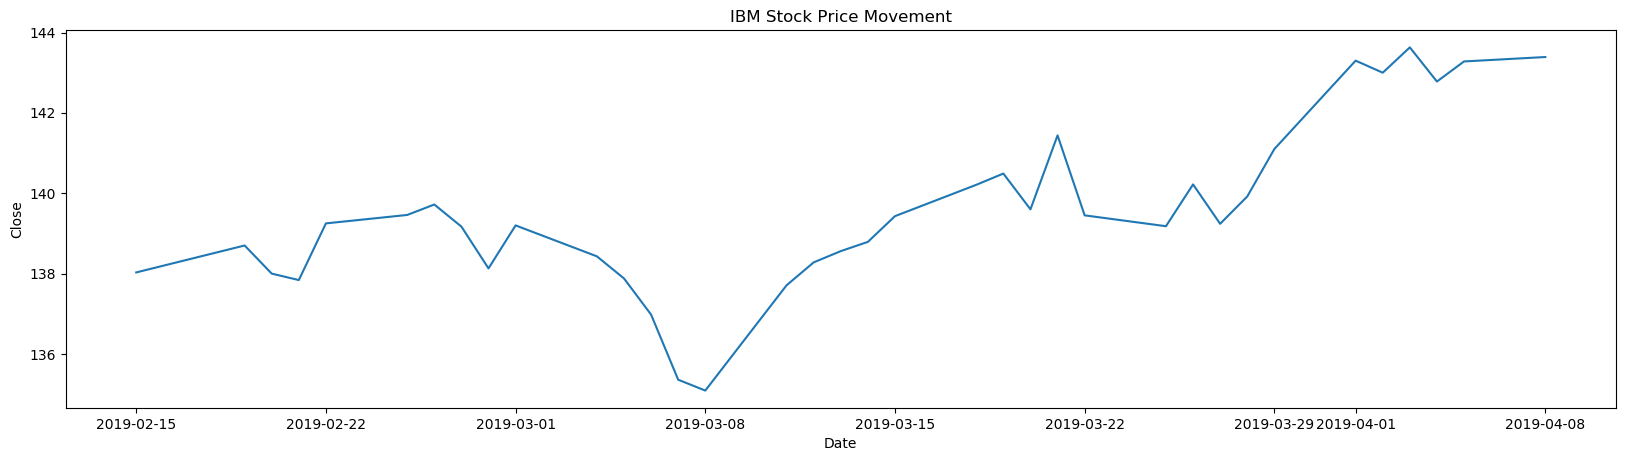

In [31]:
movement_graph(df,'IBM_company','IBM_senti','publishedDate')
stock_movement(IBMstock,'Date','Close','IBM')

# AMZN

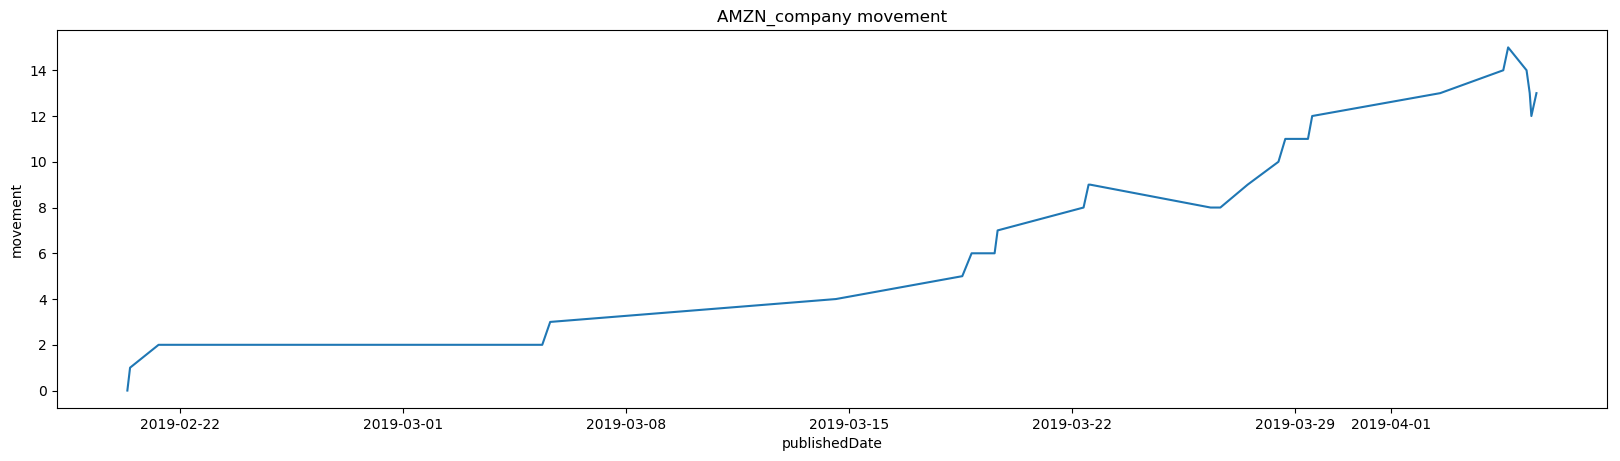

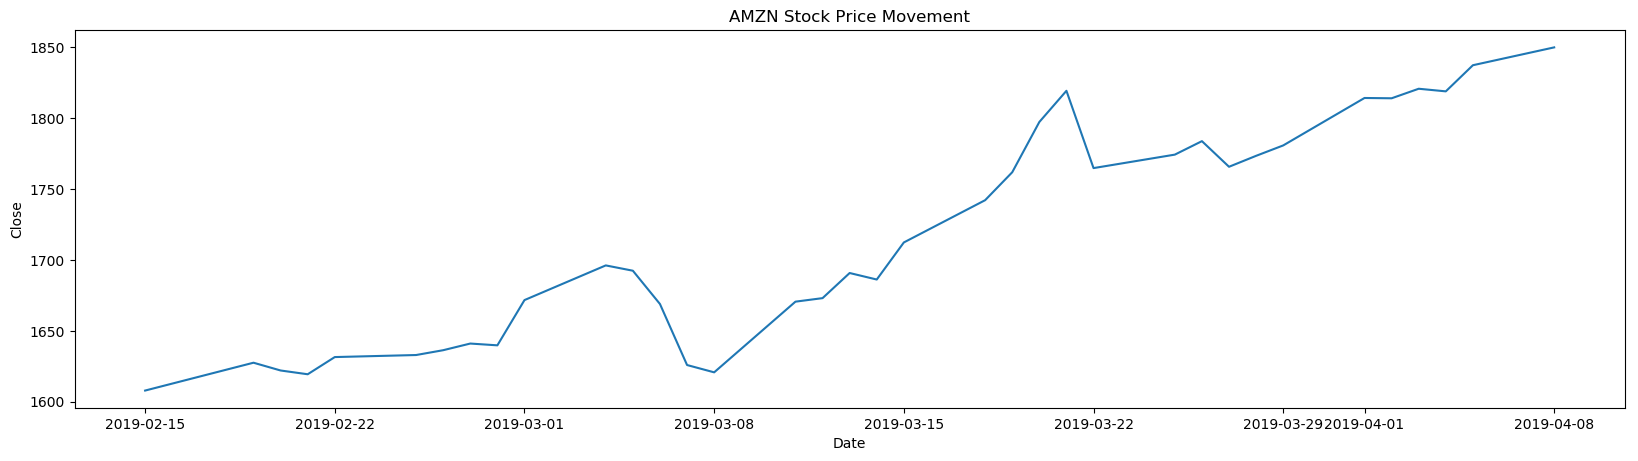

In [32]:
movement_graph(df,'AMZN_company','AMZN_senti','publishedDate')
stock_movement(AMZNstock,'Date','Close','AMZN')

# MSFT

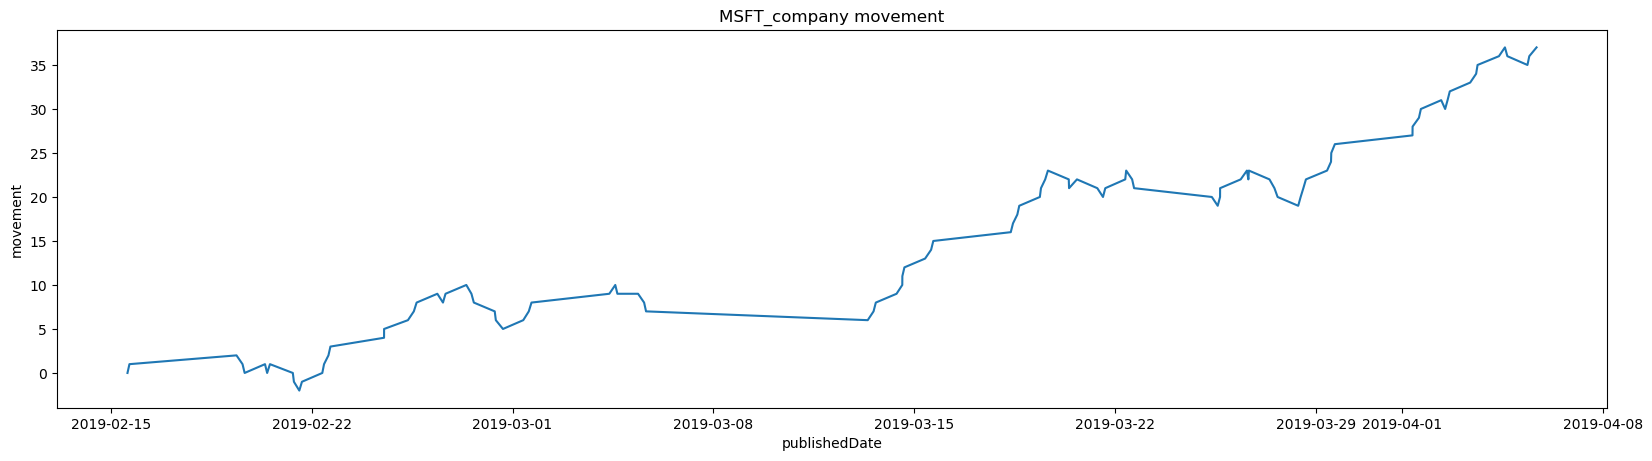

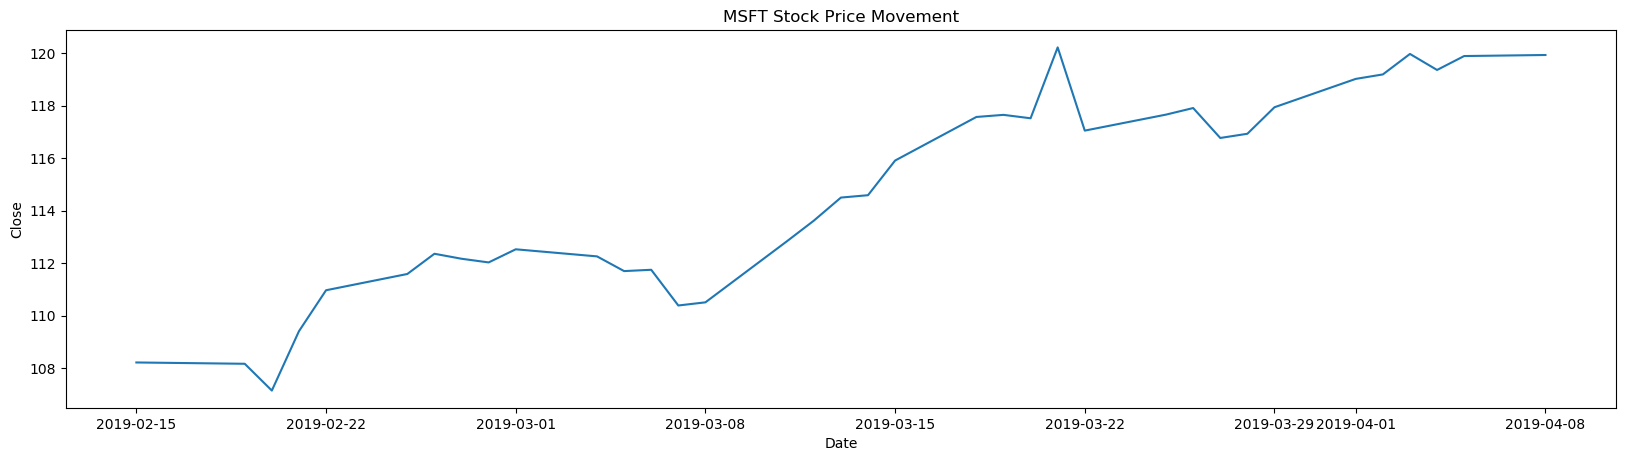

In [33]:
movement_graph(df,'MSFT_company','MSFT_senti','publishedDate')
stock_movement(MSFTstock,'Date','Close','MSFT')